In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

ModuleNotFoundError: No module named 'sklearn'

In [1]:
from google.colab import files
uploaded = files.upload()

# Access the uploaded file
import pandas as pd
data = pd.read_csv('water_potability.csv')


ModuleNotFoundError: No module named 'google.colab'

In [6]:
data = data.dropna()

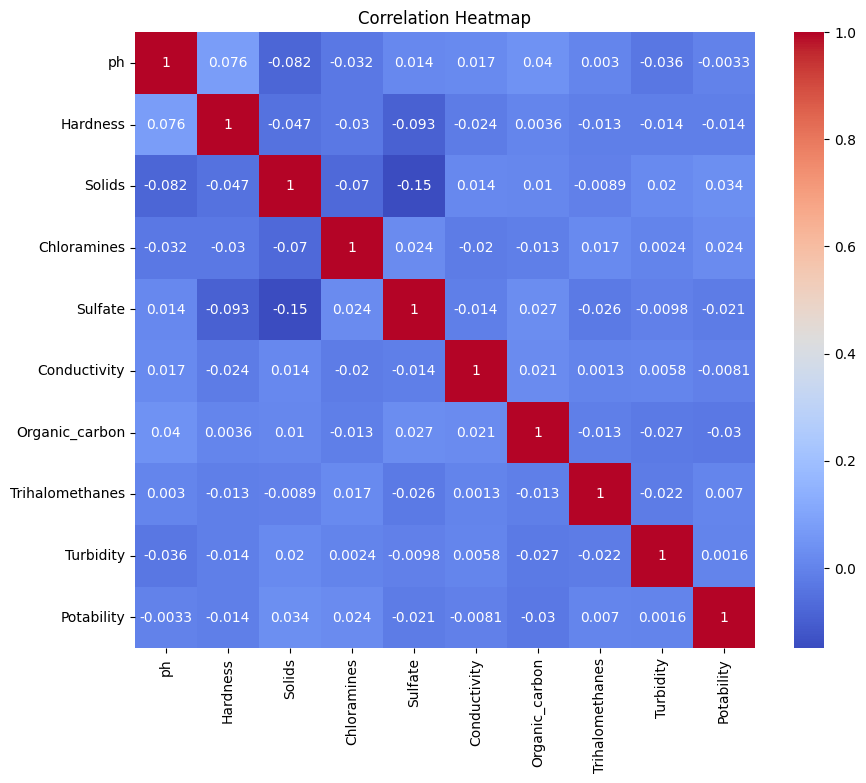

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
X = data.drop('Potability', axis=1)
y = data['Potability']


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       600
           1       0.64      0.30      0.41       383

    accuracy                           0.66       983
   macro avg       0.65      0.60      0.59       983
weighted avg       0.66      0.66      0.63       983



Confusion Matrix:


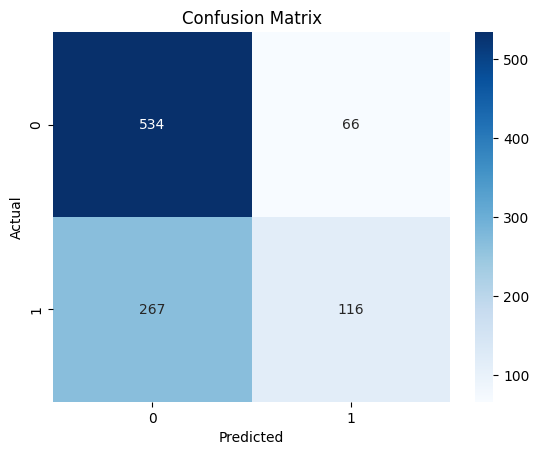

In [16]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")

ROC-AUC Score: 0.65


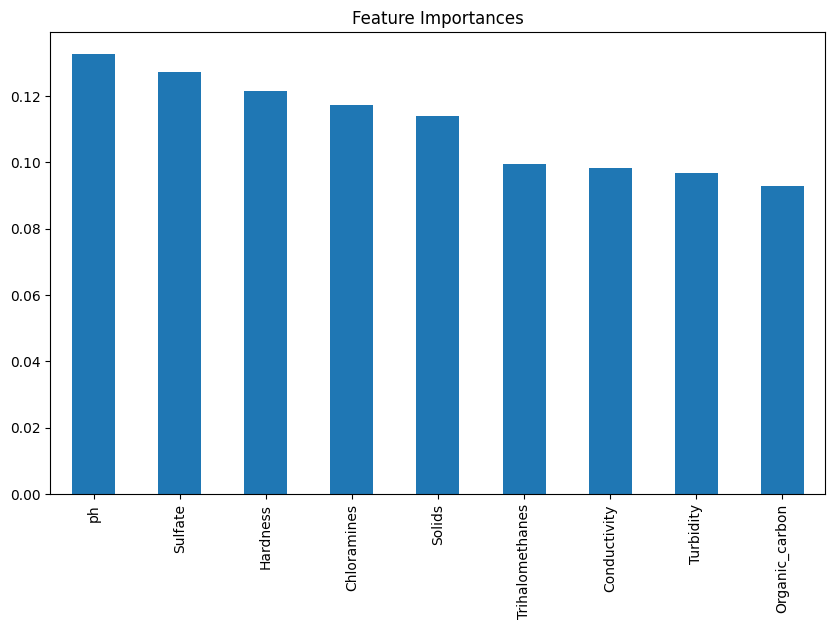

In [18]:
feature_importances = pd.Series(rf_model.feature_importances_, index=data.columns[:-1])
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()

In [22]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: PH")
figure.show()

In [23]:
figure = px.histogram(data, x = "Hardness",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

In [24]:
figure = px.histogram(data, x = "Solids",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

In [25]:
figure = px.histogram(data, x = "Chloramines",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

In [28]:
figure = px.histogram(data, x = "Sulfate",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

In [29]:
figure = px.histogram(data, x = "Turbidity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

In [30]:
figure = px.histogram(data, x = "Trihalomethanes",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

In [31]:
figure = px.histogram(data, x = "Organic_carbon",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

In [32]:
figure = px.histogram(data, x = "Conductivity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

In [33]:
import joblib
joblib.dump(rf_model, 'water_quality_model.pkl')

['water_quality_model.pkl']

In [37]:
loaded_model = joblib.load('water_quality_model.pkl')

# Example prediction
new_sample = [[7.0, 150.0, 20000.0, 0.02, 60.0, 1.0, 200.0, 300.0, 50.0]]
prediction = loaded_model.predict(new_sample)
print("Potable" if prediction[0] == 1 else "Not Potable")

Not Potable
